## Preprocessing

In [1]:
user = 'Zihan'
model_name = 'CNN'

In [2]:
import sys
import json

print ("Initializing global variables...", end=' ')
sys.stdout.flush()

# Filepaths
dict_path = './' + user + '/dictionaries/'
model_path = './' + user + '/models/'
hist_path = './' + user + '/histories/'
fig_path = './' + user + '/figs/'

# shared result file
output_file = './results.txt'

print ("Done")
print ("  Filepath set to [" + user + "]'s directory")

##################################################

print ("Importing modules...", end=' ')
import modules
print ("Done")

##################################################

print ("Reading data from disk...", end=' ')
sys.stdout.flush()

import numpy as np
import pandas as pd

df = pd.read_parquet('./Tian/Metal_all_20180116.snappy.parquet')

# Extract zinc-binded, single-chained protein sequences
df_zn = df.loc[df['ligandId'] == 'ZN']
df_zn_single = df_zn.loc[df_zn['interactingChains'] == 1]
seqs = np.array(df_zn_single.sequence)
target = np.array(df_zn_single.fingerprint)
cluster_numbers = np.array(df_zn_single.clusterNumber90)

del df,df_zn,df_zn_single

# Remove seqs containing 'U' and 'X'
rows_to_delete = []
for i in range(seqs.shape[0]):
    if 'X' in seqs[i] or 'U' in seqs[i] or np.isnan(cluster_numbers[i]):
        rows_to_delete.append(i) 

        
seqs = np.delete(seqs, rows_to_delete, 0)
target = np.delete(target, rows_to_delete)
cluster_numbers = np.delete(cluster_numbers, rows_to_delete)
print ("Done")

##################################################

print ("Loading dictionaries...", end=' ')
sys.stdout.flush()

# FOFE
vocab_dic_fofe = {}
with open(dict_path + "vocab_dict_fofe", 'r') as fp:
        vocab_dic_fofe = json.load(fp)


print ("Done")

##################################################

print ("Performing cross validation split...", end=' ')
ratio = 0.9
split = int(ratio*len(seqs))
train_seqs, val_seqs = seqs[:split], seqs[split:]
train_label, val_label = target[:split], target[split:]
train_cluster, val_cluster = cluster_numbers[:split], cluster_numbers[split:]
print ("Done")
print ("  Ratio :", ratio)
print ("  Train_range :", 0, "-", split-1)
print ("  Val_range :", split, "-", len(seqs)-1)

Initializing global variables... Done
  Filepath set to [Zihan]'s directory
Importing modules... 

Using TensorFlow backend.


Done
Reading data from disk... Done
Loading dictionaries... Done
Performing cross validation split... Done
  Ratio : 0.9
  Train_range : 0 - 20502
  Val_range : 20503 - 22781


## Data Generator

- <font color=blue>FOFE Encoding</font>

In [3]:
train_args = {'sequences': train_seqs,
              'labels': train_label,
              'translator': vocab_dic_fofe,
              'cluster_numbers': train_cluster}
val_args = {'sequences': val_seqs,
            'labels': val_label,
            'translator': vocab_dic_fofe,
            'cluster_numbers': val_cluster}
common_args = {'batch_size': 100,
               'input_shape': (800,),
               'label_shape': (706, ),
               'shuffle': True}

train_gen_0 = modules.FOFEGenerator(**train_args, **common_args)
val_gen_0 = modules.FOFEGenerator(**val_args, **common_args)

In [4]:
train_gen = train_gen_0
val_gen = val_gen_0

## Model
- <font color=blue>CNN</font>

In [ ]:
# ProtVec:100, One-hot:20, blosum62:20, property:7
dimension = 800
cutoff = 706

import tensorflow as tf
import time
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution1D, MaxPooling1D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Reshape, Embedding, Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
import numpy as np
import keras
from keras.models import Model, load_model
from keras.optimizers import Adam, SGD, RMSprop
# Visualization
from keras.utils import plot_model

input_shape = (dimension,)

input_0 = Input(shape=input_shape, dtype='float32')
input_0_reshape = Reshape((1,dimension,1), input_shape=(dimension,))(input_0)
conv2d_3 = Convolution2D(2, 1, 3, border_mode='same')(input_0_reshape)
conv2d_5 = Convolution2D(2, 1, 5, border_mode='same')(input_0_reshape)
conv2d_7 = Convolution2D(2, 1, 7, border_mode='same')(input_0_reshape)

x = keras.layers.concatenate([conv2d_3,conv2d_5,conv2d_7])
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(cutoff, activation='relu')(x)
output_0 = Dense(cutoff, activation='softmax')(x)
#output_0_reshape = Reshape((cutoff,1), input_shape=(cutoff,))(output_0)

#model = Model(inputs=input_0, outputs=output_0_reshape)
model = Model(inputs=input_0, outputs=output_0)                              
# end of the MODEL

sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0, nesterov = False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

## Model
- <font color=blue>Deeper CNN</font>

In [5]:
# ProtVec:100, One-hot:20, blosum62:20, property:7
dimension = 800
cutoff = 706

import tensorflow as tf
import time
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution1D, MaxPooling1D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Reshape, Embedding, Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
import numpy as np
import keras
from keras.models import Model, load_model
from keras.optimizers import Adam, SGD, RMSprop
# Visualization
from keras.utils import plot_model

input_shape = (dimension,)

input_0 = Input(shape=input_shape, dtype='float32')
input_0_reshape = Reshape((1,dimension,1), input_shape=(dimension,))(input_0)
conv2d_0 = Convolution2D(16, 1, 3, border_mode='same')(input_0_reshape)
conv2d_1 = Convolution2D(16, 1, 5, border_mode='same')(input_0_reshape)
conv2d_2 = Convolution2D(16, 1, 7, border_mode='same')(input_0_reshape)

x = keras.layers.concatenate([conv2d_0,conv2d_1,conv2d_2])
x = Activation('relu')(x)

conv2d_3 = Convolution2D(16, 1, 1, border_mode='same')(x)
conv2d_4 = Convolution2D(16, 1, 2, border_mode='same')(x)
conv2d_5 = Convolution2D(16, 1, 3, border_mode='same')(x)

x1 = keras.layers.concatenate([conv2d_3,conv2d_4,conv2d_5])
x1 = Activation('relu')(x1)

x2 = keras.layers.concatenate([x1,x])




x2 = Flatten()(x2)
x2 = Dense(cutoff, activation='relu')(x2)
output_0 = Dense(cutoff, activation='softmax')(x2)
#output_0_reshape = Reshape((cutoff,1), input_shape=(cutoff,))(output_0)

#model = Model(inputs=input_0, outputs=output_0_reshape)
model = Model(inputs=input_0, outputs=output_0)                              
# end of the MODEL

sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0, nesterov = False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 800)          0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 800, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 800, 16)   64          reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1, 800, 16)   96          reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_3 (

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 3), padding="same")`
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 5), padding="same")`
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 7), padding="same")`
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), padding="same")`
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 2), padding="same")`
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 3), padding="same")`


## Model
- <font color=blue>CNN for 2 inputs</font>

In [ ]:
dimension_0 = 800
dimension_1 = 800
cutoff = 706

import tensorflow as tf
import time
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution1D, MaxPooling1D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Reshape, Embedding, Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
import numpy as np
import keras
from keras.models import Model, load_model
from keras.optimizers import Adam, SGD, RMSprop
# Visualization
from keras.utils import plot_model

input_shape_0 = (dimension_0,)
input_shape_1 = (dimension_1,)

input_0 = Input(shape=input_shape_0, dtype='float32')
input_0_reshape = Reshape((1,dimension_0,1), input_shape=input_shape_0)(input_0)
conv2d_3_0 = Convolution2D(2, 1, 3, border_mode='same')(input_0_reshape)
conv2d_5_0 = Convolution2D(2, 1, 5, border_mode='same')(input_0_reshape)
conv2d_7_0 = Convolution2D(2, 1, 7, border_mode='same')(input_0_reshape)

input_1 = Input(shape=input_shape_1, dtype='float32')
input_1_reshape = Reshape((1,dimension_1,1), input_shape=input_shape_1)(input_1)
conv2d_3_1 = Convolution2D(2, 1, 3, border_mode='same')(input_1_reshape)
conv2d_5_1 = Convolution2D(2, 1, 5, border_mode='same')(input_1_reshape)
conv2d_7_1 = Convolution2D(2, 1, 7, border_mode='same')(input_1_reshape)

x_0 = keras.layers.concatenate([conv2d_3_0,conv2d_5_0,conv2d_7_0])
x_0 = Activation('relu')(x_0)
x_0 = Flatten()(x_0)

x_1 = keras.layers.concatenate([conv2d_3_1,conv2d_5_1,conv2d_7_1])
x_1 = Activation('relu')(x_1)
x_1 = Flatten()(x_1)

x = keras.layers.concatenate([x_0,x_1])

x = Dense(cutoff, activation='relu')(x)
output_0 = Dense(cutoff, activation='softmax')(x)
#output_0_reshape = Reshape((cutoff,1), input_shape=(cutoff,))(output_0)

#model = Model(inputs=input_0, outputs=output_0_reshape)
model = Model(inputs=[input_0, input_1], outputs=output_0)                              
# end of the MODEL

sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0, nesterov = False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

- <font color=blue>Threshold: mean+2.33*std</font>

In [6]:
def threshold_func(y_in):
    factor = 2.33
    y_out = np.zeros_like(y_in)
    for i in range(y_in.shape[0]):
        th= np.mean(y_in[i]) + factor * np.std(y_in[i])
        y_out[i] = (y_in[i] > th)
    return y_out

- <font color=blue>Metric: F1 score</font>

In [7]:
cb = modules.F1_history(threshold_func)

model_args = {'model': model, 
              'generators': [train_gen, val_gen], 
              'callbacks': [cb], 
              'post_train_args': {'user': user, 
                                  'model': model_name, 
                                  'result': output_file, 
                                  'fig_path': fig_path}}

trainer = modules.Trainer(**model_args)

Callback initialized.
Assigning validation generator... Done
Matching input shape... Done
Matching output shape... Done
Trainer initialized.


Epoch 1/10
205/205 [==============================] - 150s 729ms/step - loss: 15.6040 - acc: 0.1228
Epoch 2/10
205/205 [==============================] - 147s 718ms/step - loss: 11.0224 - acc: 0.1798
Epoch 3/10
205/205 [==============================] - 147s 718ms/step - loss: 9.8181 - acc: 0.1862
Epoch 4/10
205/205 [==============================] - 147s 718ms/step - loss: 8.7710 - acc: 0.2050
Epoch 5/10
205/205 [==============================] - 147s 719ms/step - loss: 8.3736 - acc: 0.2130
Epoch 6/10
205/205 [==============================] - 147s 718ms/step - loss: 8.0092 - acc: 0.2111
Epoch 7/10
205/205 [==============================] - 148s 721ms/step - loss: 8.7595 - acc: 0.2071
Epoch 8/10
205/205 [==============================] - 147s 718ms/step - loss: 8.7853 - acc: 0.2019
Epoch 9/10
205/205 [==============================] - 147s 717ms/step - loss: 7.8446 - acc: 0.2156
Epoch 10/10
205/205 [==============================] - 147s 718ms/step - loss: 7.5075 - acc: 0.2184
[End of

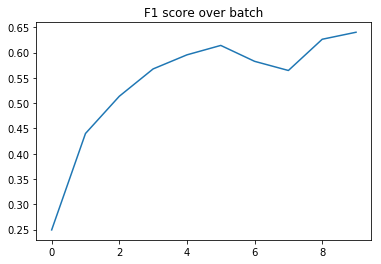

In [8]:
import warnings; 
warnings.simplefilter('ignore')
trainer.start(epoch=10)